Namespace(Diters=5, DitersAlt=100, batch_size=1000, clamp_lower=-0.01, clamp_upper=0.01, decDRatio=0.0001, encDRatio=0.0001, gpu_ids=[0, 1], imdir='/root/images/release_4_1_17_2D', imsize=64, lrDec=0.0001, lrDecD=5e-05, lrEnc=0.0001, lrEncD=5e-05, myseed=0, nepochs=20000, nlatentdim=16, saveProgressIter=1, saveStateIter=10, save_dir='./waaegan_1E-4')
Epoch: 768


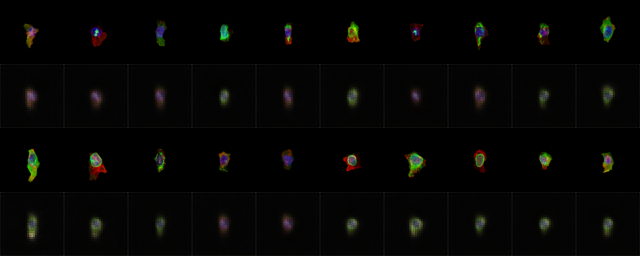

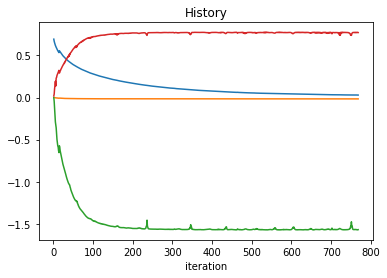

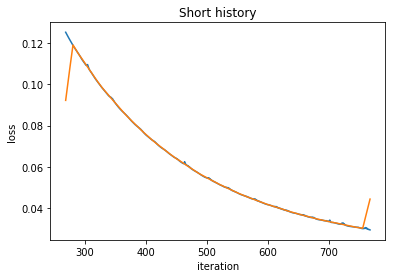

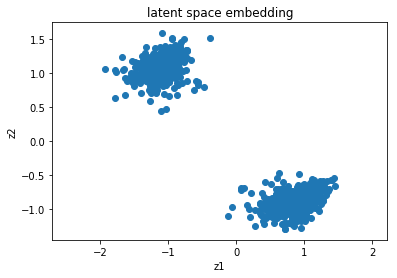

In [14]:
import SimpleLogger as SimpleLogger
import torch
from IPython.core.display import Image, display
import pickle
import matplotlib.pyplot as plt
import numpy as np



from sklearn.neighbors import KernelDensity

import sklearn

%matplotlib inline

model_dir = './waaegan/'
model_dir = './waaegan_1E-4/'
# model_dir = './semi_waaegan/'


history = 500
bw = 25

opt = pickle.load( open( '{0}/opt.pkl'.format(model_dir), "rb" ) )
logger = pickle.load( open( '{0}/logger.pkl'.format(model_dir), "rb" ) )
embedding = pickle.load( open('./{0}/embedding.pkl'.format(model_dir), "rb"))

print(opt)

epoch = max(logger.log['epoch'])

print('Epoch: ' + str(epoch))

plt.figure(1)
plt.plot(logger.log['iter'], logger.log['reconLoss'])
plt.plot(logger.log['iter'], logger.log['encDLoss'])
plt.plot(logger.log['iter'], logger.log['decDLoss'])
plt.plot(logger.log['iter'], logger.log['minimaxDecDLoss'])
# plt.ylim([-4, 4]) 
plt.title('History')
plt.xlabel('iteration')


x = logger.log['iter'][-history:]
y = logger.log['reconLoss'][-history:]

f = np.ones(bw)/bw
yhat = np.correlate(y-np.mean(y), f, mode='same').tolist() + np.mean(y)

plt.figure(2)
plt.plot(x, y)
plt.plot(x, yhat)

plt.title('Short history')
plt.xlabel('iteration')
plt.ylabel('loss')


plt.figure(3)
plt.scatter(embedding[:,0], embedding[:,1])
plt.xlim([-4, 4]) 
plt.ylim([-4, 4])     
plt.axis('equal')
plt.xlabel('z1')
plt.ylabel('z2')
plt.title('latent space embedding')
plt.savefig('./{0}/embedding_{1}.png'.format(opt.save_dir, epoch), dpi=75)


im_progress_path = '{0}/progress_{1}.png'.format(model_dir, epoch)
display(Image(im_progress_path, unconfined=True))

